# Image Segmentation with K-Means

In [1]:
from mpl_toolkits import mplot3d
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_height, img_width = 128,128

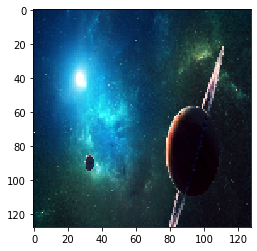

In [3]:
img = cv2.cvtColor(cv2.imread('test.jpg'), cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (img_width, img_height))

plt.imshow(img)
plt.show()

In [4]:
pixel_values = np.reshape(img, (-1,3))
pixel_values.shape

(16384, 3)

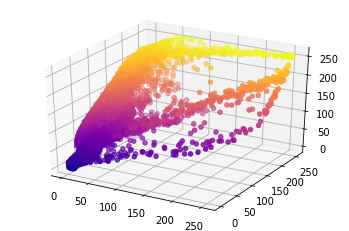

In [5]:
fig = plt.figure()
ax = plt.axes(projection="3d")
z_points = pixel_values[:,2]
x_points = pixel_values[:,0]
y_points = pixel_values[:,1]
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='plasma')
plt.show()

In [6]:
class K_Means:
    '''
    K-Means Algorithm.
    '''
    
    def __init__(self, k, data_points):
        '''
        Initialize parameters, centroids and restructure data points.
        '''
        
        self.k = k
        self.data_points = data_points
        self.flag = False #used for the stopping criteria of the algorithm later
        
        self.centroids = []
        for i in range(self.k):
            self.centroids.append(self.data_points[i, :]) #the centroid is chosen from the first k data points.
        
        #in order to identify a data point with a certain centroid, we'll use an extra column to represent
        #the index of the centroid from the list of centroids. We'll create a new column in every data point
        #and initialize them to 0 at first.
        
        #same shape as data_points but with an extra column in the second dimension.
        init_zeros = np.zeros((self.data_points.shape[0], self.data_points.shape[1]+1)) 
        init_zeros[:,:-1] = self.data_points #fill everything except the last column with the data points
        self.data_points = init_zeros
    
    def calculate_distance(self, point1, point2):
        '''
        Calculates the Euclidean distance between two given points.
        '''
        return np.linalg.norm(point1 - point2)
    
    
    def __call__(self):
        '''
        Step 1 : Calculates the distance between each data point and each centroid and assign the closest
                 centroid to the data point.
        Step 2 : Calculates the mean of every data point in each cluster and assign the value of the mean to
                 the associated centroid.
        Step 3 : Repeat Step 1 and 2 until there are no more changes to be done to the centroids.
        '''
        while (not self.flag): #iterates until the flag is set to True.
            
            for data in self.data_points:
                
                #initialize the variable and the index of the centroid in the data point array.
                init_distance = self.calculate_distance(data[:-1], self.centroids[0]) 
                data[-1] = 0
                
                for index,centroid in enumerate(self.centroids[1:], start=1):
                    
                    distance = self.calculate_distance(data[:-1], centroid)
                    
                    if distance < init_distance:
                        #if the distance is closer than the first centroid, then re-assign the values.
                        init_distance = distance
                        data[-1] = index
            
            
            self.flag = True #this will be changed if the centroids are updated.
            for cluster_index in range(self.k):
                
                #get all the data points that belong to a certain cluster.
                cluster_data = self.data_points[self.data_points[:, -1] == cluster_index]
                
                mean = np.mean(cluster_data[:,:-1], axis=0) #calculates the mean of the data points on axis 0.
                
                #if the current cluster value and the mean value is the same, skip the loop.
                #if this happens for all the centroids, the flag value will remain true and therefore
                #meeting the stopping criteria.
                if np.array_equal(self.centroids[cluster_index], mean):
                    continue
                
                #updates the centroid with the new mean value and change the flag value to continue the loop.
                self.centroids[cluster_index] = mean
                self.flag = False
        
        return (self.data_points, self.centroids)       

In [ ]:
kmeans = K_Means(k = 5, data_points=pixel_values)
new_data, centroids = kmeans()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection="3d")
z_points = new_data[:,2]
x_points = new_data[:,0]
y_points = new_data[:,1]
ax.scatter3D(x_points, y_points, z_points,c=new_data[:,-1], cmap="hot")
plt.show()

In [ ]:
for k in range(len(centroids)):
    new_data[new_data[:, -1] == k, :-1] = centroids[k]

In [ ]:
segmented_image = np.reshape(new_data[:,:-1], (img_height, img_width, 3))

In [ ]:
plt.imshow(segmented_image.astype(np.uint8))
plt.show()